In [2]:
import os, glob, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "7"
import keras
from keras.layers import Input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications import DenseNet121, InceptionV3, VGG16, VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import SGD
from keras.utils import multi_gpu_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.ticker as ticker


In [17]:
PATH = './01_data/pH_data_aug/'
label_folder = os.listdir(PATH)
label_li = [int(float(l.split('_')[-1])) for l in label_folder if not 'csv' in l]

row, col = 224,224
img_path_li = list()
data_img = [[],[],[]]
data_label = [[],[],[]]

print('*'*30)
print('Load data')
print('*'*30)
for label_path in label_folder:
        print(label_path)
        label = float(label_path.split('_')[-1])
        img_path_tmp = sorted(glob.glob(PATH+label_path+'/*'))
    #     print('test')
        for path in img_path_tmp[-15:]:
    #         print(path)
            img = cv2.resize(cv2.imread(path), (row, col))
            data_img[2].append(img)
            data_label[2].append(label)
        
test_x, test_y = np.array(data_img[2]), np.array(data_label[2])

test_x=preprocess_input(test_x)
# test_y = test_y/200
print(test_x.shape, test_y.shape)


******************************
Load data
******************************
Date_pH_1.13
Date_pH_10.2
Date_pH_11.43
Date_pH_2.38
Date_pH_3.05
Date_pH_4.01
Date_pH_5.07
Date_pH_6.02
Date_pH_7.00
Date_pH_8.02
Date_pH_9.22
(165, 224, 224, 3) (165,)


In [18]:
model_name = 'exp2_mae_nor_224_vgg16_pH'

# model = keras.models.load_model('./{}.h5'.format(model_name))
# ypred = model.predict(test_x)
# print(model.evaluate(test_x, test_y))
# print("MSE: %.4f" % mean_squared_error(test_y, ypred))
# print("MAE: %.4f" % mean_absolute_error(test_y, ypred))


print('*'*30)
print('Best model evaluate')
print('*'*30)
model_best = keras.models.load_model('./{}.h5'.format(model_name))
ypred_best = model_best.predict(test_x, batch_size=1)
print(model_best.evaluate(test_x, test_y))
print("MSE: %.4f" % mean_squared_error(test_y, ypred_best))
print("MAE: %.4f" % mean_absolute_error(test_y, ypred_best))

******************************
Best model evaluate
******************************
6/6 [==============================] - 6s 1s/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_squared_error: 0.0697
[0.2053169459104538, 0.2053169459104538, 0.06965170800685883]
MSE: 0.0697
MAE: 0.2053


/home/user/miniconda3/envs/gipyo/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


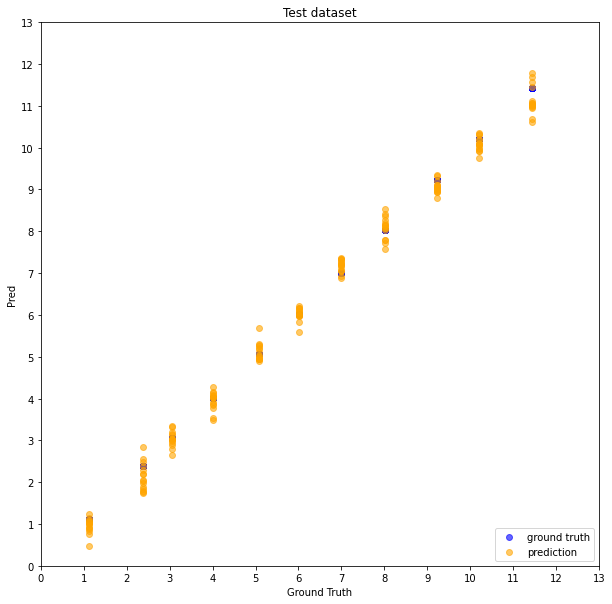

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(test_y.flatten(), test_y.flatten(), alpha=0.6,c='blue', label = 'ground truth')

plt.scatter(test_y.flatten(), ypred_best.flatten(), alpha=0.6,c='orange' , label = 'prediction')

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.xlim([0, 13])
plt.ylim([0, 13])
plt.title('Test dataset')
plt.xlabel('Ground Truth')
plt.ylabel('Pred')
plt.legend(loc=4)
plt.savefig('{}.png'.format(model_name), dpi=300)